# **Tarea 6: Autoencoders Sparse y Denoising**

**Objetivo:** Implementar arquitecturas autoencoder eficientes para analizar datos de imágenes y maximizar la clasificación de individuos.

## Importar Librerías

In [ ]:
import os  # Para manejo de directorios
import numpy as np  # Para manejo de arrays
import matplotlib.pyplot as plt  # Para manejo de gráficos
import tensorflow as tf  # Para manejo de redes neuronales
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Para manejo de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para aumento de datos
import random  # Para manejo de números aleatorios
import pandas as pd  # Para manejo de DataFrames
from PIL import Image  # Para manejo de imágenes
from sklearn.model_selection import train_test_split  # Para dividir el dataset
from tensorflow.keras.layers import Input, Dense, GaussianNoise  # Para capas de redes neuronales
from tensorflow.keras.models import Model  # Para crear modelos
from tensorflow.keras.regularizers import l1  # Para regularización L1
from tensorflow.keras.callbacks import EarlyStopping  # Para Early Stopping

## Carga de Datos

In [ ]:
# Reemplaza el enlace con el enlace directo obtenido
!wget -O face_dataset.zip "https://github.com/Negatix092/DM1/raw/main/Autoencoders/face_dataset.zip"

--2024-11-10 22:59:43--  https://github.com/Negatix092/DM1/raw/main/Autoencoders/face_dataset.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Negatix092/DM1/main/Autoencoders/face_dataset.zip [following]
--2024-11-10 22:59:44--  https://raw.githubusercontent.com/Negatix092/DM1/main/Autoencoders/face_dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2666608 (2.5M) [application/zip]
Saving to: ‘face_dataset.zip’

face_dataset.zip    100%[===================>]   2.54M  --.-KB/s    in 0.1s    

2024-11-10 22:59:44 (25.0 MB/s) - ‘face_dataset.zip’ saved [2666608/2666608]



In [ ]:
# Descomprime el archivo en el directorio actual
!unzip face_dataset.zip -d face_dataset

Archive:  face_dataset.zip
replace face_dataset/__MACOSX/._face_dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Listar el contenido de la carpeta descomprimida para asegurarte de que todo esté correcto
!ls face_dataset

face_dataset  __MACOSX


In [ ]:
# Listar el contenido de la carpeta para verificar la existencia de las carpetad de train & test
!ls face_dataset/face_dataset/

test  train


___

In [23]:
import os  # Para manejo de directorios
import numpy as np  # Para manejo de arrays
import matplotlib.pyplot as plt  # Para manejo de gráficos
import tensorflow as tf  # Para manejo de redes neuronales
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # Para manejo de imágenes
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Para aumento de datos
import random  # Para manejo de números aleatorios
import pandas as pd  # Para manejo de DataFrames
from PIL import Image  # Para manejo de imágenes
from sklearn.model_selection import train_test_split  # Para dividir el dataset
from tensorflow.keras.layers import Input, Dense, GaussianNoise  # Para capas de redes neuronales
from tensorflow.keras.models import Model  # Para crear modelos
from tensorflow.keras.regularizers import l1  # Para regularización L1
from tensorflow.keras.callbacks import EarlyStopping  # Para Early Stopping

In [24]:
# Definir las rutas y cargar las imágenes
train_dir = '/content/face_dataset/face_dataset/train'
test_dir = '/content/face_dataset/face_dataset/test'

# Definir el tamaño de las imágenes
img_size = (128, 128)

# Función para cargar las imágenes
def cargar_imagenes(ruta, img_size=(128, 128)):
    imagenes = []
    for img_name in os.listdir(ruta):
        img_path = os.path.join(ruta, img_name)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img)
        imagenes.append(img_array)
    return np.array(imagenes)

# Cargar imágenes de entrenamiento y prueba
X_train = cargar_imagenes(train_dir, img_size)
X_test = cargar_imagenes(test_dir, img_size)

# Imprimir estadísticas antes de la normalización
print("---------------Antes de la Normalización---------------")
print("\nX_train")
print("Valor mínimo: ", np.min(X_train))
print("Valor máximo: ", np.max(X_train))
print("Valor medio:  ", np.mean(X_train))

print("\nX_test")
print("Valor mínimo: ", np.min(X_test))
print("Valor máximo: ", np.max(X_test))
print("Valor medio:  ", np.mean(X_test))

# Normalizar los valores de los píxeles a [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Dividir el dataset de entrenamiento en entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=26)

# Imprimir tamaño de cada conjunto después de la división
print("\nTamaño del conjunto de entrenamiento final: ", X_train.shape)
print("Tamaño del conjunto de validación:           ", X_val.shape)
print("Tamaño del conjunto de prueba:               ", X_test.shape)

# Imprimir estadísticas después de la normalización
print("\n---------------Después de la Normalización---------------")
print("\nX_train")
print("Valor mínimo: ", np.min(X_train))
print("Valor máximo: ", np.max(X_train))
print("Valor medio:  ", np.mean(X_train))

print("\nX_val")
print("Valor mínimo: ", np.min(X_val))
print("Valor máximo: ", np.max(X_val))
print("Valor medio:  ", np.mean(X_val))

print("\nX_test")
print("Valor mínimo:", np.min(X_test))
print("Valor máximo:", np.max(X_test))
print("Valor medio: ", np.mean(X_test))

---------------Antes de la Normalización---------------

X_train
Valor mínimo:  0.0
Valor máximo:  255.0
Valor medio:   111.66865

X_test
Valor mínimo:  0.0
Valor máximo:  255.0
Valor medio:   106.77395

Tamaño del conjunto de entrenamiento final:  (160, 128, 128, 3)
Tamaño del conjunto de validación:            (40, 128, 128, 3)
Tamaño del conjunto de prueba:                (12, 128, 128, 3)

---------------Después de la Normalización---------------

X_train
Valor mínimo:  0.0
Valor máximo:  1.0
Valor medio:   0.43824565

X_val
Valor mínimo:  0.0
Valor máximo:  1.0
Valor medio:   0.43659905

X_test
Valor mínimo: 0.0
Valor máximo: 1.0
Valor medio:  0.4187213


Modelos de Autoencoders Convolucionales

Denoising

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# EarlyStopping para monitorear la pérdida de validación
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Configuraciones de Autoencoder Convolucional Denoising
denoising_configs = [
    {'encoding_dim': 32, 'activation': 'relu', 'noise_factor': 0.1},
    {'encoding_dim': 64, 'activation': 'relu', 'noise_factor': 0.2},
    {'encoding_dim': 128, 'activation': 'relu', 'noise_factor': 0.3},
]

# Redimensionar los datos de entrada
X_train = X_train.reshape(-1, 128, 128, 3)
X_val = X_val.reshape(-1, 128, 128, 3)

# Entrenamiento del Autoencoder Convolucional Denoising con diferentes configuraciones
denoising_histories = []
# Lista para guardar los modelos Denoising Autoencoder
denoising_models = []

for config in denoising_configs:
    encoding_dim = config['encoding_dim']
    activation_fn = config['activation']
    noise_factor = config['noise_factor']

    # Añadir ruido a los datos de entrenamiento y validación para denoising
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
    X_val_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)
    X_val_noisy = np.clip(X_val_noisy, 0., 1.)

    # Definir el modelo de Autoencoder Convolucional
    input_img = Input(shape=(128, 128, 3))  # Respetar la forma redimensionada

    # Encoder
    x = Conv2D(64, (3, 3), activation=activation_fn, padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.1)(x)
    x = Conv2D(128, (3, 3), activation=activation_fn, padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.1)(x)
    encoded = Conv2D(encoding_dim, (3, 3), activation=activation_fn, padding='same')(x)

    # Decoder
    x = Conv2D(encoding_dim, (3, 3), activation=activation_fn, padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation=activation_fn, padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation=activation_fn, padding='same')(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_absolute_error')

    # Entrenar el Autoencoder Convolucional de Denoising
    print(f"Entrenando Denoising AE con Dim: {encoding_dim}, Noise Factor: {noise_factor}")
    history = autoencoder.fit(
        X_train_noisy, X_train,  # Usar entrada ruidosa y salida limpia redimensionada
        epochs=70,
        batch_size=16,
        shuffle=True,
        validation_data=(X_val_noisy, X_val),  # Usar datos de validación ruidosos y salida limpia redimensionada
        callbacks=[early_stopping],
        verbose=1
    )
    denoising_histories.append((config, history))
    denoising_models.append(autoencoder)  # Guardar el modelo específico para cada configuración

Entrenando Denoising AE con Dim: 32, Noise Factor: 0.1
Epoch 1/70
10/10 [==============================] - 5s 396ms/step - loss: 0.1990 - val_loss: 0.1905
Epoch 2/70
10/10 [==============================] - 0s 29ms/step - loss: 0.1937 - val_loss: 0.1840
Epoch 3/70
10/10 [==============================] - 0s 29ms/step - loss: 0.1829 - val_loss: 0.1659
Epoch 4/70
10/10 [==============================] - 0s 27ms/step - loss: 0.1612 - val_loss: 0.1476
Epoch 5/70
10/10 [==============================] - 0s 27ms/step - loss: 0.1269 - val_loss: 0.1273
Epoch 6/70
10/10 [==============================] - 0s 29ms/step - loss: 0.0991 - val_loss: 0.0981
Epoch 7/70
10/10 [==============================] - 0s 30ms/step - loss: 0.0858 - val_loss: 0.0933
Epoch 8/70
10/10 [==============================] - 0s 30ms/step - loss: 0.0783 - val_loss: 0.0737
Epoch 9/70
10/10 [==============================] - 0s 26ms/step - loss: 0.0719 - val_loss: 0.0766
Epoch 10/70
10/10 [==============================] - 

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# EarlyStopping para monitorear la pérdida de validación
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Configuraciones de Autoencoder Convolucional Sparsity
sparse_configs = [
    {'encoding_dim': 32, 'activation': 'relu', 'regularization': 1e-5},
    {'encoding_dim': 64, 'activation': 'relu', 'regularization': 1e-4},
    {'encoding_dim': 128, 'activation': 'relu', 'regularization': 1e-3},
]

# Entrenamiento del Autoencoder Convolucional Sparsity con diferentes configuraciones
sparse_histories = []
# Lista para guardar los modelos Sparse Autoencoder
sparse_models = []


for config in sparse_configs:
    encoding_dim = config['encoding_dim']
    activation_fn = config['activation']
    regularization = config['regularization']

    # Definir el modelo de Autoencoder Convolucional
    input_img = Input(shape=(128, 128, 3))  # Respetar la forma redimensionada

    # Encoder
    x = Conv2D(64, (3, 3), activation=activation_fn, padding='same', activity_regularizer=l1(regularization))(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.1)(x)
    x = Conv2D(128, (3, 3), activation=activation_fn, padding='same', activity_regularizer=l1(regularization))(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.1)(x)
    encoded = Conv2D(encoding_dim, (3, 3), activation=activation_fn, padding='same', activity_regularizer=l1(regularization))(x)

    # Decoder
    x = Conv2D(encoding_dim, (3, 3), activation=activation_fn, padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation=activation_fn, padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation=activation_fn, padding='same')(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(learning_rate=1e-4), loss='mean_absolute_error')

    # Entrenar el Autoencoder Convolucional Sparsity
    print(f"Entrenando Sparse AE con Dim: {encoding_dim}, Regularization: {regularization}")
    history = autoencoder.fit(
        X_train, X_train,  # Usar entrada limpia y salida limpia
        epochs=70,
        batch_size=16,
        shuffle=True,
        validation_data=(X_val, X_val),  # Usar datos de validación limpios
        callbacks=[early_stopping],
        verbose=1
    )
    sparse_histories.append((config, history))
    sparse_models.append(autoencoder)  # Guardar el modelo específico para cada configuración

Entrenando Sparse AE con Dim: 32, Regularization: 1e-05
Epoch 1/70
10/10 [==============================] - 2s 48ms/step - loss: 1.0503 - val_loss: 0.9383
Epoch 2/70
10/10 [==============================] - 0s 31ms/step - loss: 0.8976 - val_loss: 0.8157
Epoch 3/70
10/10 [==============================] - 0s 30ms/step - loss: 0.7882 - val_loss: 0.7238
Epoch 4/70
10/10 [==============================] - 0s 30ms/step - loss: 0.7051 - val_loss: 0.6533
Epoch 5/70
10/10 [==============================] - 0s 32ms/step - loss: 0.6377 - val_loss: 0.5975
Epoch 6/70
10/10 [==============================] - 0s 32ms/step - loss: 0.5773 - val_loss: 0.5503
Epoch 7/70
10/10 [==============================] - 0s 31ms/step - loss: 0.5137 - val_loss: 0.5108
Epoch 8/70
10/10 [==============================] - 0s 32ms/step - loss: 0.4385 - val_loss: 0.4868
Epoch 9/70
10/10 [==============================] - 0s 32ms/step - loss: 0.3672 - val_loss: 0.4678
Epoch 10/70
10/10 [==============================] - 


Visualización de Pérdidas - Autoencoder Convolucional Denoising


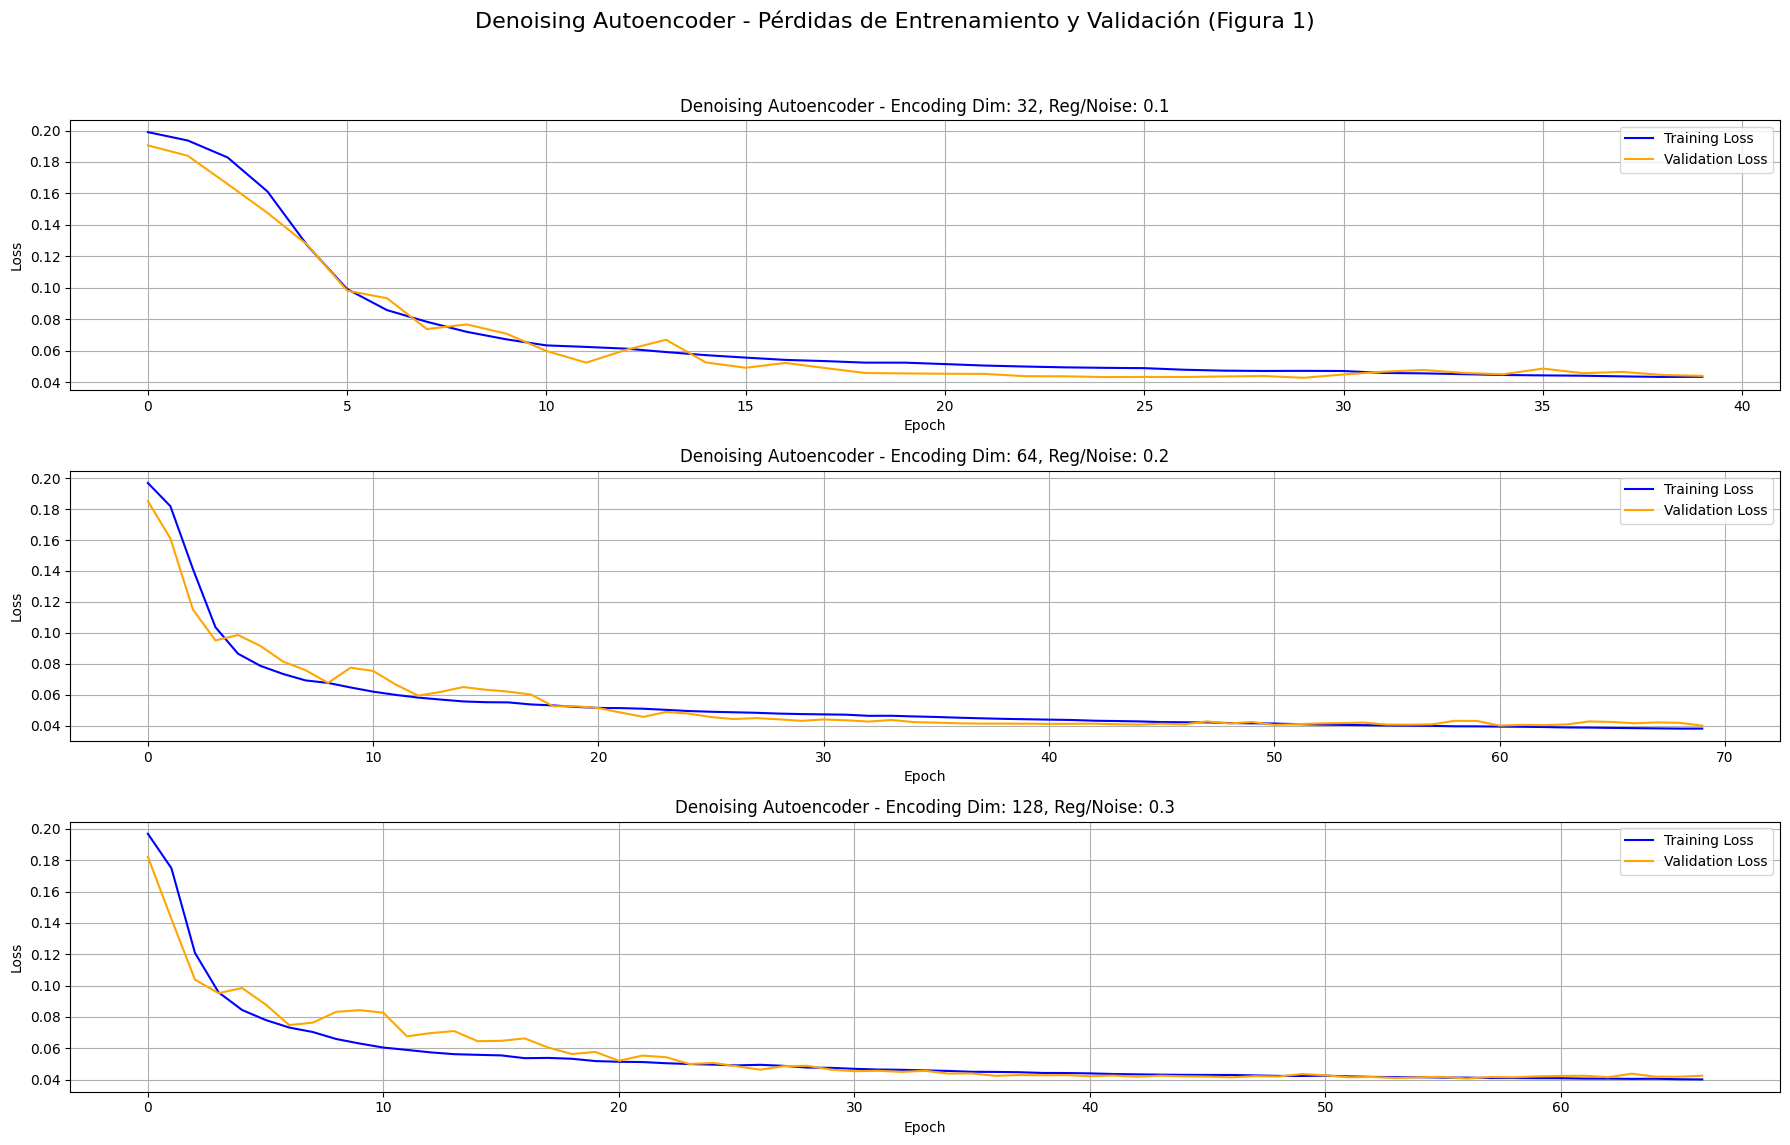


Visualización de Pérdidas - Autoencoder Convolucional Sparsity


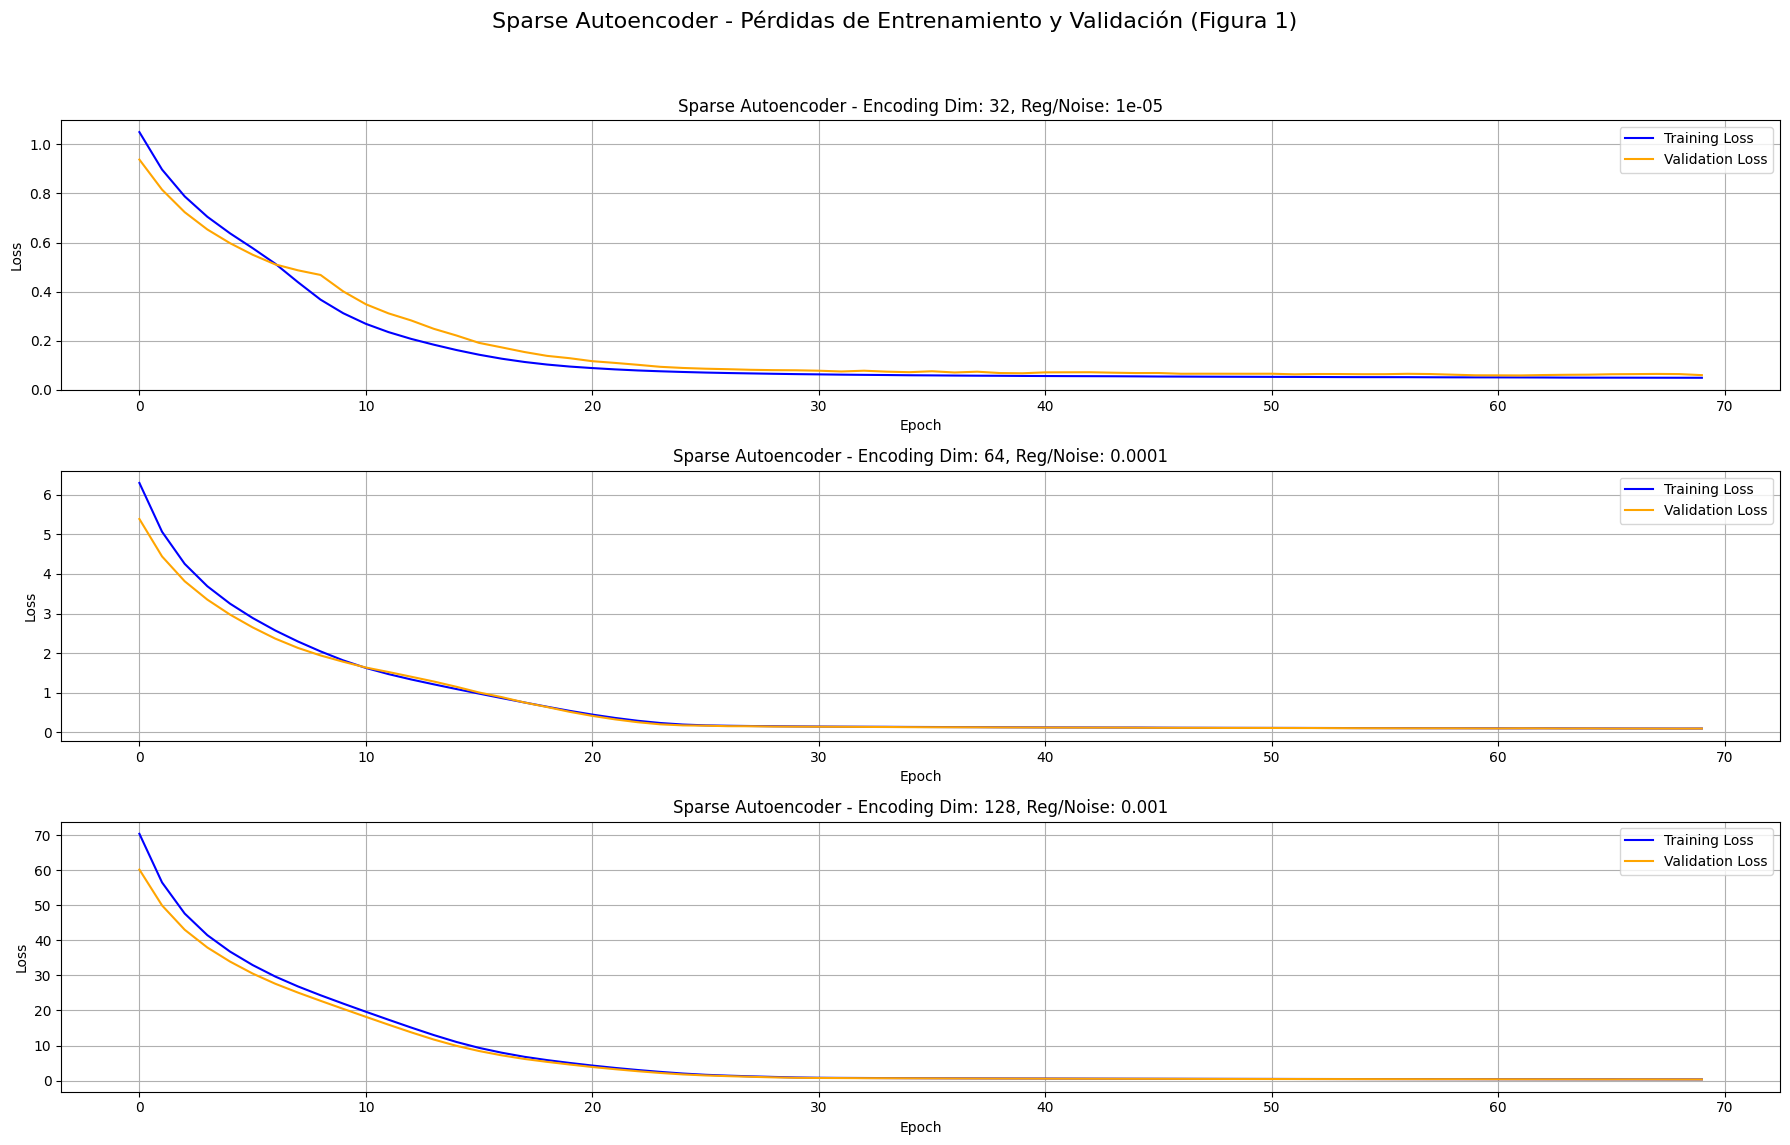

In [53]:
import matplotlib.pyplot as plt
import math

# Parámetros de configuración para los gráficos
plots_per_figure = 3  # Número de gráficos por figura para una mejor visualización

# Función para graficar pérdidas
def graficar_perdidas(histories, titulo):
    num_plots = len(histories)
    num_figures = math.ceil(num_plots / plots_per_figure)

    for fig in range(num_figures):
        plt.figure(figsize=(18, 12))
        for i in range(plots_per_figure):
            plot_idx = fig * plots_per_figure + i
            if plot_idx >= num_plots:
                break

            config, history = histories[plot_idx]
            encoding_dim = config.get('encoding_dim', 'N/A')
            reg_or_noise = config.get('regularization', config.get('noise_factor', 'N/A'))

            # Graficar las pérdidas de entrenamiento y validación
            plt.subplot(plots_per_figure, 1, i + 1)
            plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-')
            plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-')
            plt.title(f"{titulo} - Encoding Dim: {encoding_dim}, Reg/Noise: {reg_or_noise}")
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)

        plt.suptitle(f"{titulo} - Pérdidas de Entrenamiento y Validación (Figura {fig + 1})", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

# Visualizar pérdidas para el Autoencoder Convolucional Denoising
print("\nVisualización de Pérdidas - Autoencoder Convolucional Denoising")
graficar_perdidas(denoising_histories, "Denoising Autoencoder")

# Visualizar pérdidas para el Autoencoder Convolucional Sparsity
print("\nVisualización de Pérdidas - Autoencoder Convolucional Sparsity")
graficar_perdidas(sparse_histories, "Sparse Autoencoder")

Espacio Original


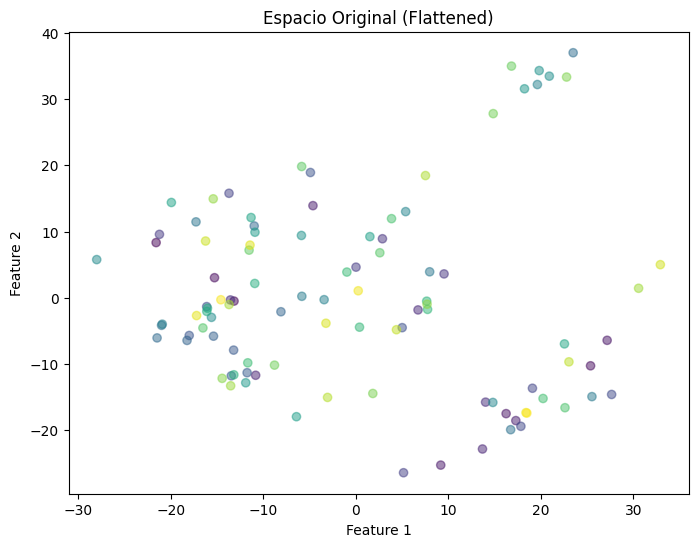


Espacio Latente - Denoising Autoencoder
4/4 [==============================] - 3s 429ms/step


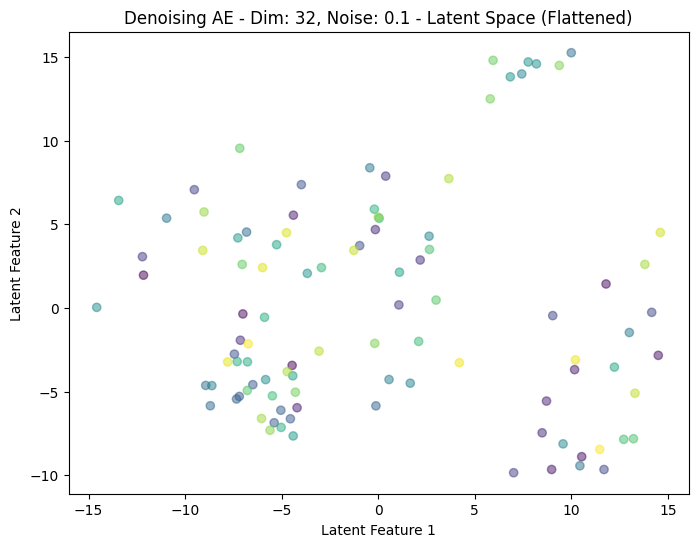

4/4 [==============================] - 1s 141ms/step


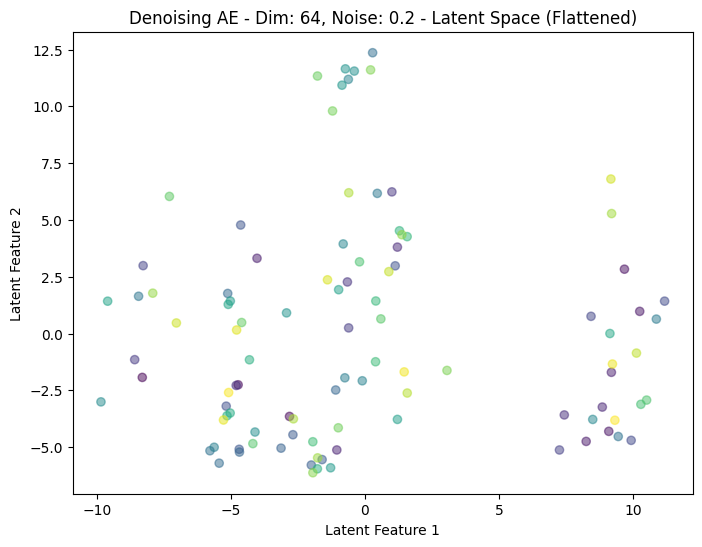

4/4 [==============================] - 1s 184ms/step


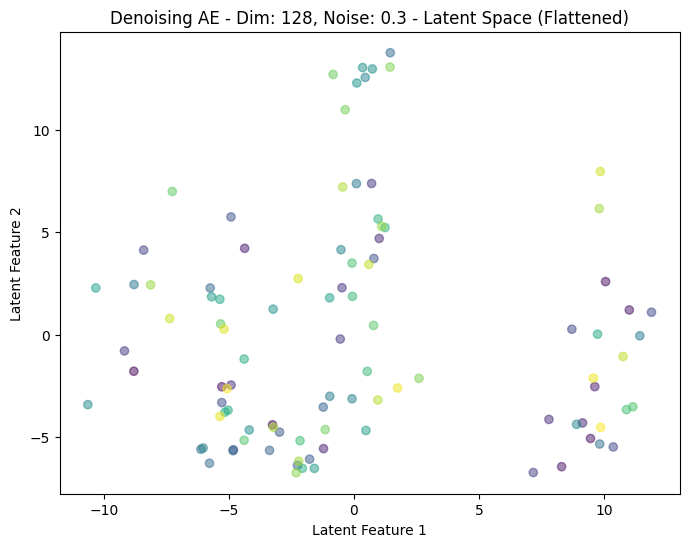


Espacio Latente - Sparse Autoencoder
4/4 [==============================] - 0s 3ms/step


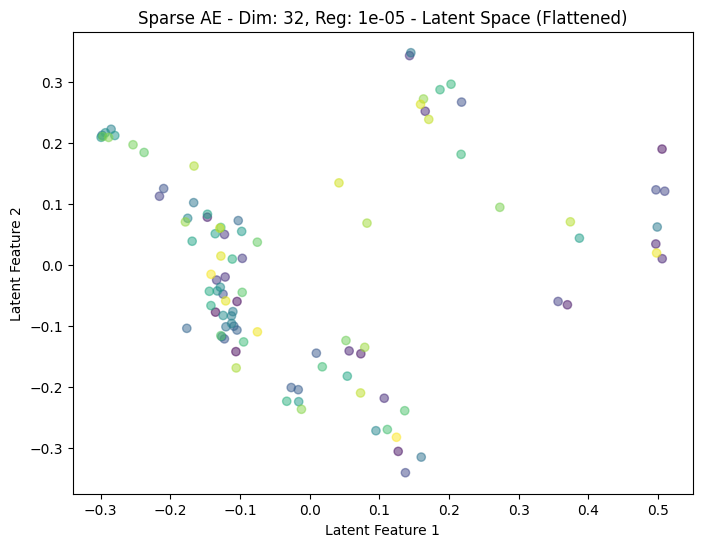

4/4 [==============================] - 0s 3ms/step


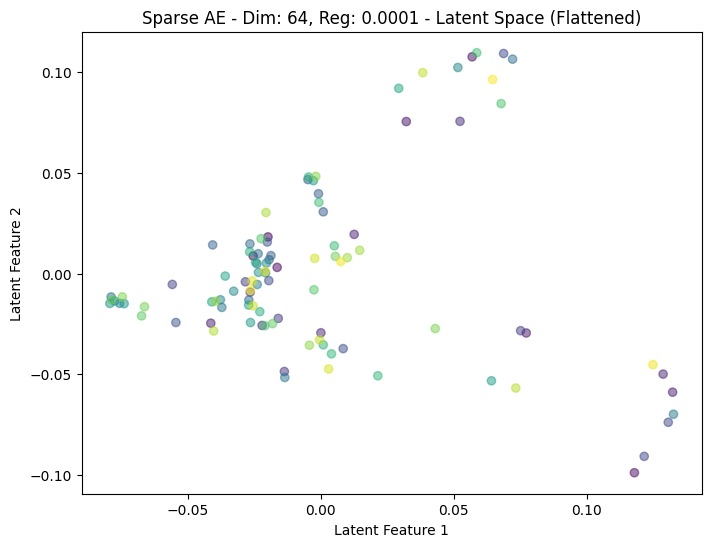

4/4 [==============================] - 0s 3ms/step


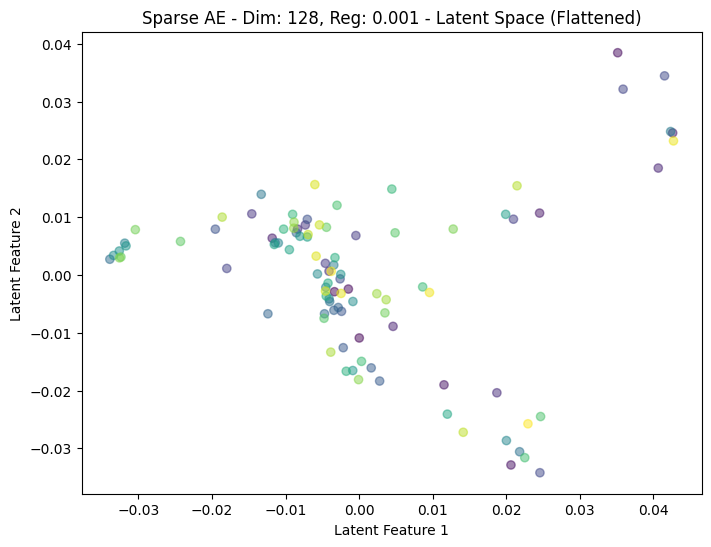

In [54]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Función para graficar el espacio original (aplanado y reducido con PCA)
def graficar_espacio_original(X, title="Espacio Original", num_samples=100):
    num_samples = min(len(X), num_samples)
    X_sample = X[:num_samples].reshape(num_samples, -1)
    pca = PCA(n_components=2)
    original_pca = pca.fit_transform(X_sample)

    plt.figure(figsize=(8, 6))
    plt.scatter(original_pca[:, 0], original_pca[:, 1], alpha=0.5, c=np.arange(len(original_pca)), cmap='viridis')
    plt.title(f"{title} (Flattened)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Función para graficar el espacio latente del autoencoder
def graficar_espacio_latente(autoencoder, X, title="Espacio Latente", num_samples=100):
    num_samples = min(len(X), num_samples)
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-7].output)
    X_sample = X[:num_samples]
    latent_space = encoder.predict(X_sample)
    latent_flattened = latent_space.reshape(len(latent_space), -1)

    pca = PCA(n_components=2)
    latent_pca = pca.fit_transform(latent_flattened)

    plt.figure(figsize=(8, 6))
    plt.scatter(latent_pca[:, 0], latent_pca[:, 1], alpha=0.5, c=np.arange(len(latent_pca)), cmap='viridis')
    plt.title(f"{title} - Latent Space (Flattened)")
    plt.xlabel("Latent Feature 1")
    plt.ylabel("Latent Feature 2")
    plt.show()

# Visualizar el espacio original
print("Espacio Original")
graficar_espacio_original(X_train)

# Visualizar el espacio latente para cada configuración de Denoising Autoencoder
print("\nEspacio Latente - Denoising Autoencoder")
for i, (config, history) in enumerate(denoising_histories):
    encoding_dim = config['encoding_dim']
    noise_factor = config['noise_factor']
    autoencoder = denoising_models[i]
    graficar_espacio_latente(autoencoder, X_train, title=f"Denoising AE - Dim: {encoding_dim}, Noise: {noise_factor}")

# Visualizar el espacio latente para cada configuración de Sparse Autoencoder
print("\nEspacio Latente - Sparse Autoencoder")
for i, (config, history) in enumerate(sparse_histories):
    encoding_dim = config['encoding_dim']
    regularization = config['regularization']
    autoencoder = sparse_models[i]
    graficar_espacio_latente(autoencoder, X_train, title=f"Sparse AE - Dim: {encoding_dim}, Reg: {regularization}")

Funcion para calcular metricas de reconstruccion

In [55]:
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

def calcular_metricas_reconstruccion(original, reconstruido):
    # Calcular MSE
    mse_val = mean_squared_error(original.flatten(), reconstruido.flatten())

    # Calcular PSNR
    psnr_val = psnr(original, reconstruido, data_range=original.max() - original.min())

    # Calcular SSIM
    ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())

    return mse_val, psnr_val, ssim_val

Funcion para mostrar reconstruccion visual

In [56]:
import matplotlib.pyplot as plt

def mostrar_reconstruccion_visual(autoencoder, X_original, num_samples=5, title="Reconstrucción"):
    # Seleccionar muestras aleatorias
    indices = np.random.choice(len(X_original), num_samples, replace=False)
    X_sample = X_original[indices]

    # Obtener las imágenes reconstruidas
    X_reconstruido = autoencoder.predict(X_sample)

    # Mostrar imágenes originales, reconstruidas y métricas
    plt.figure(figsize=(12, 4 * num_samples))

    for i in range(num_samples):
        original = X_sample[i]
        reconstruido = X_reconstruido[i]

        # Calcular métricas
        mse_val, psnr_val, ssim_val = calcular_metricas_reconstruccion(original, reconstruido)

        # Mostrar imagen original
        plt.subplot(num_samples, 2, 2 * i + 1)
        plt.imshow(original)
        plt.title(f"Original")
        plt.axis("off")

        # Mostrar imagen reconstruida con métricas
        plt.subplot(num_samples, 2, 2 * i + 2)
        plt.imshow(reconstruido)
        plt.title(f"Reconstrucción\nMSE: {mse_val:.4f}, PSNR: {psnr_val:.2f}, SSIM: {ssim_val:.4f}")
        plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

Aplicacion a cada escenario de AE

Reconstrucción Visual y Métricas - Denoising Autoencoder
1/1 [==============================] - 3s 3s/step


<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for 

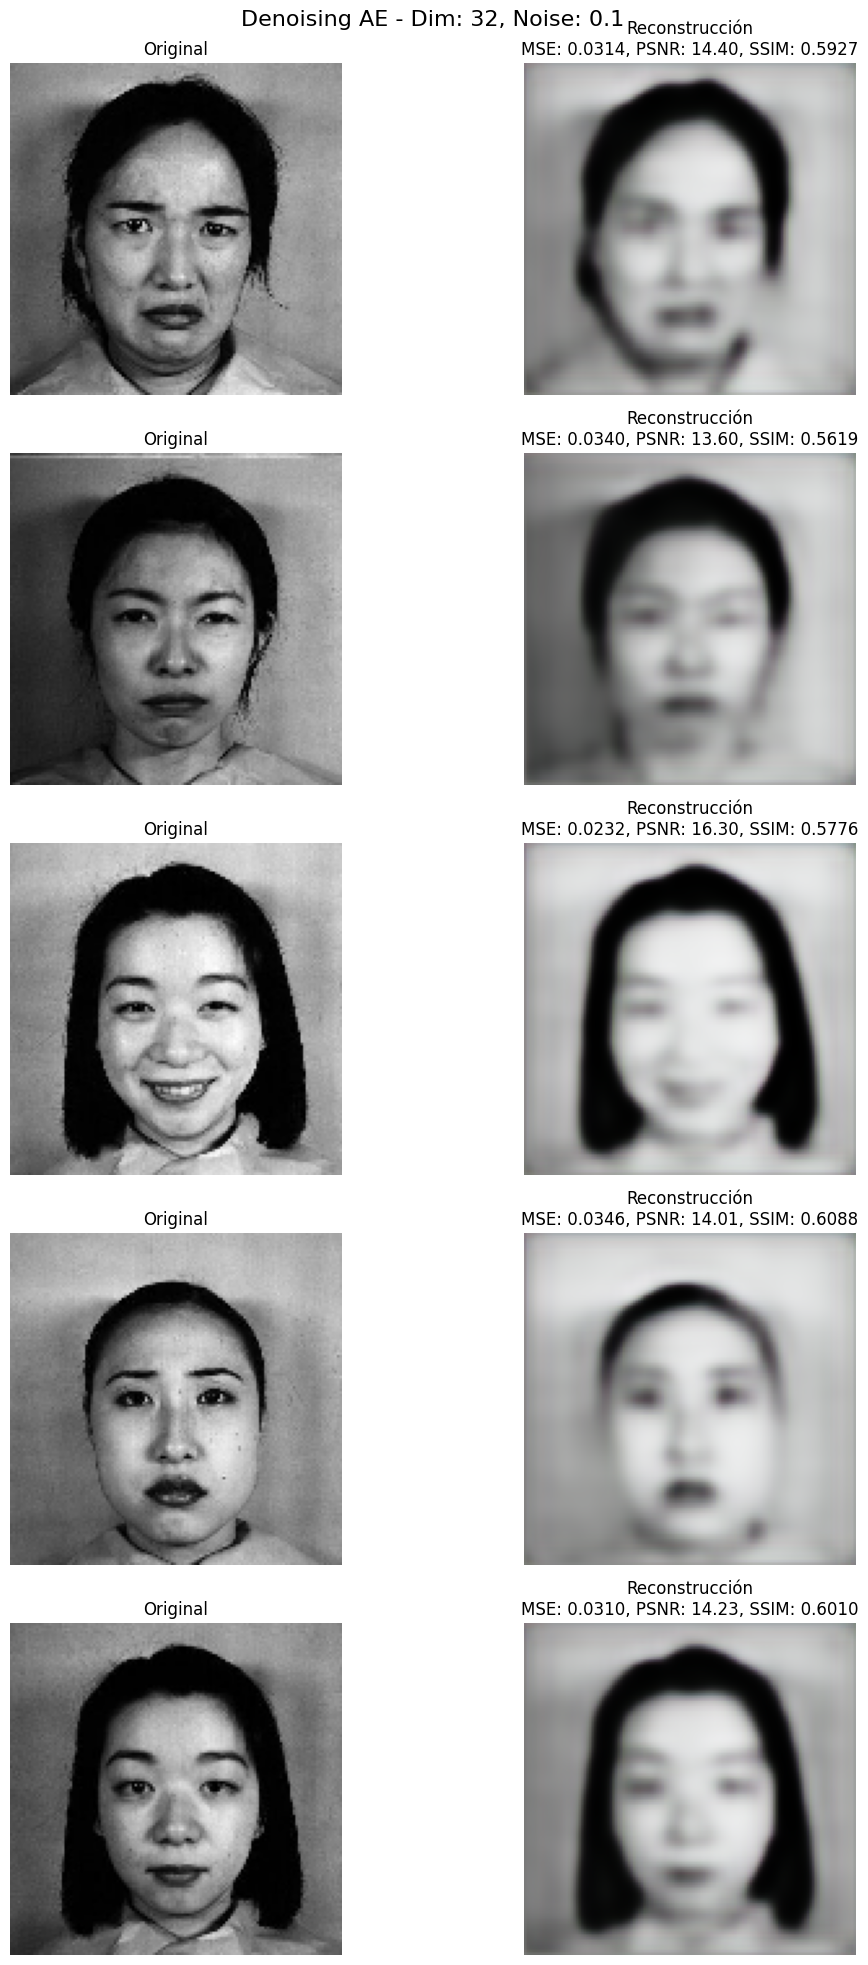

1/1 [==============================] - 1s 1s/step


<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for 

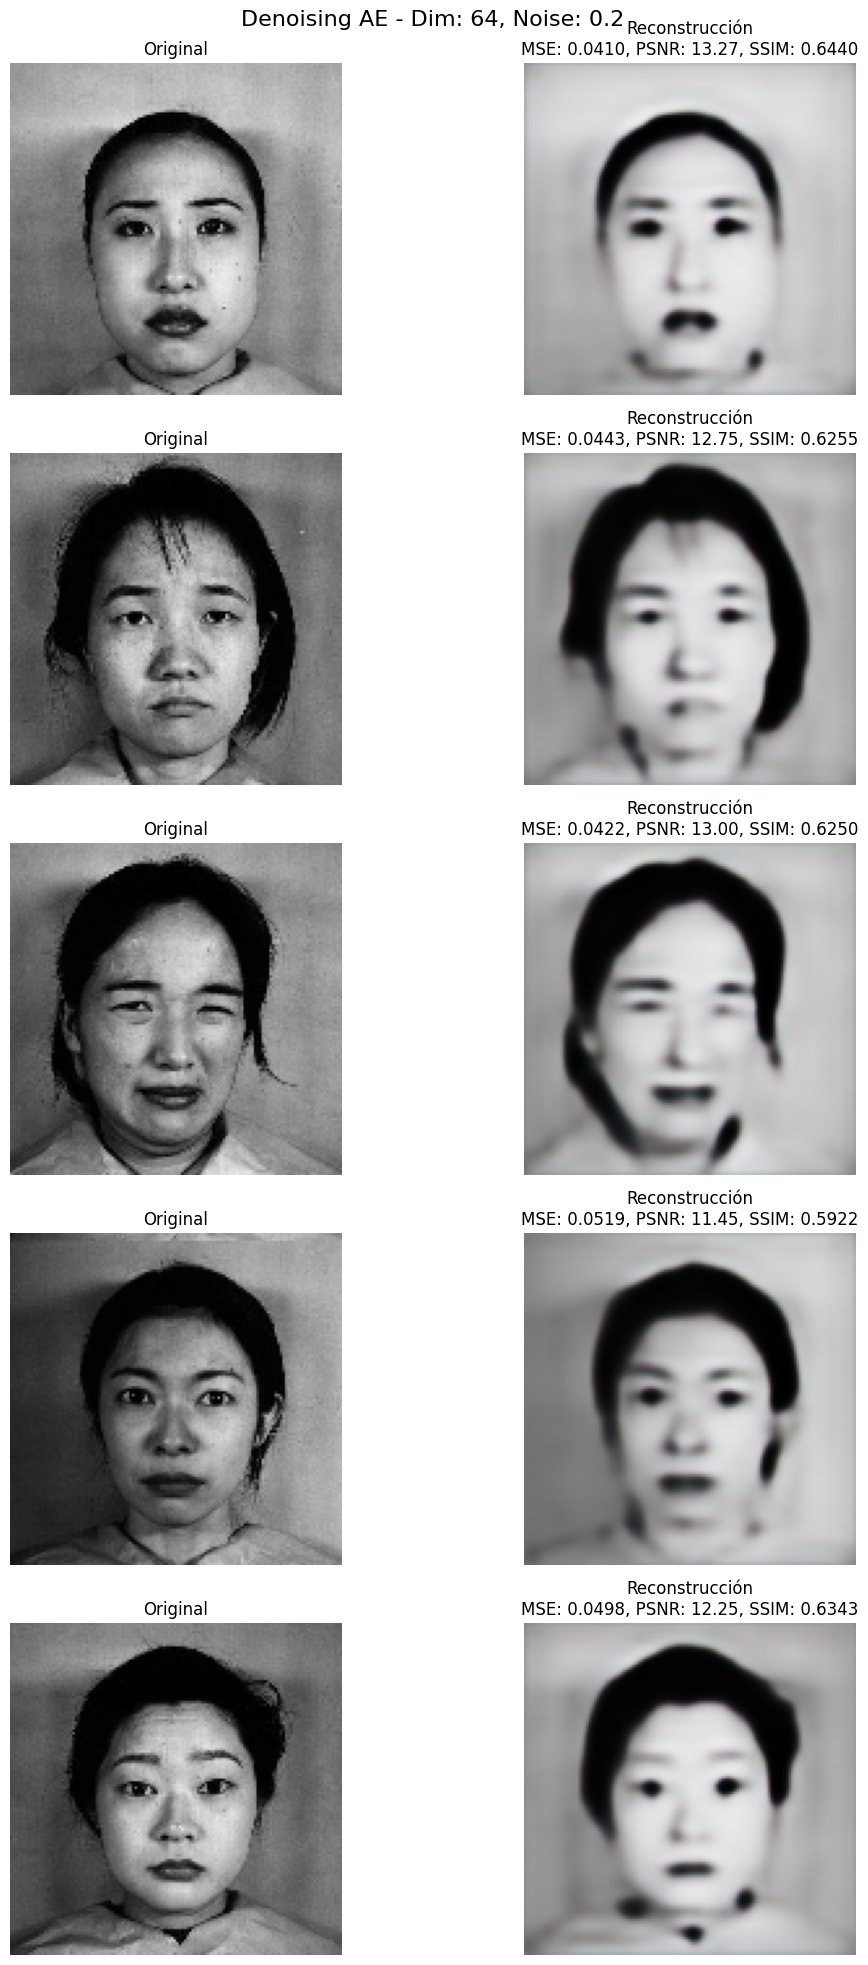

1/1 [==============================] - 1s 565ms/step


<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for 

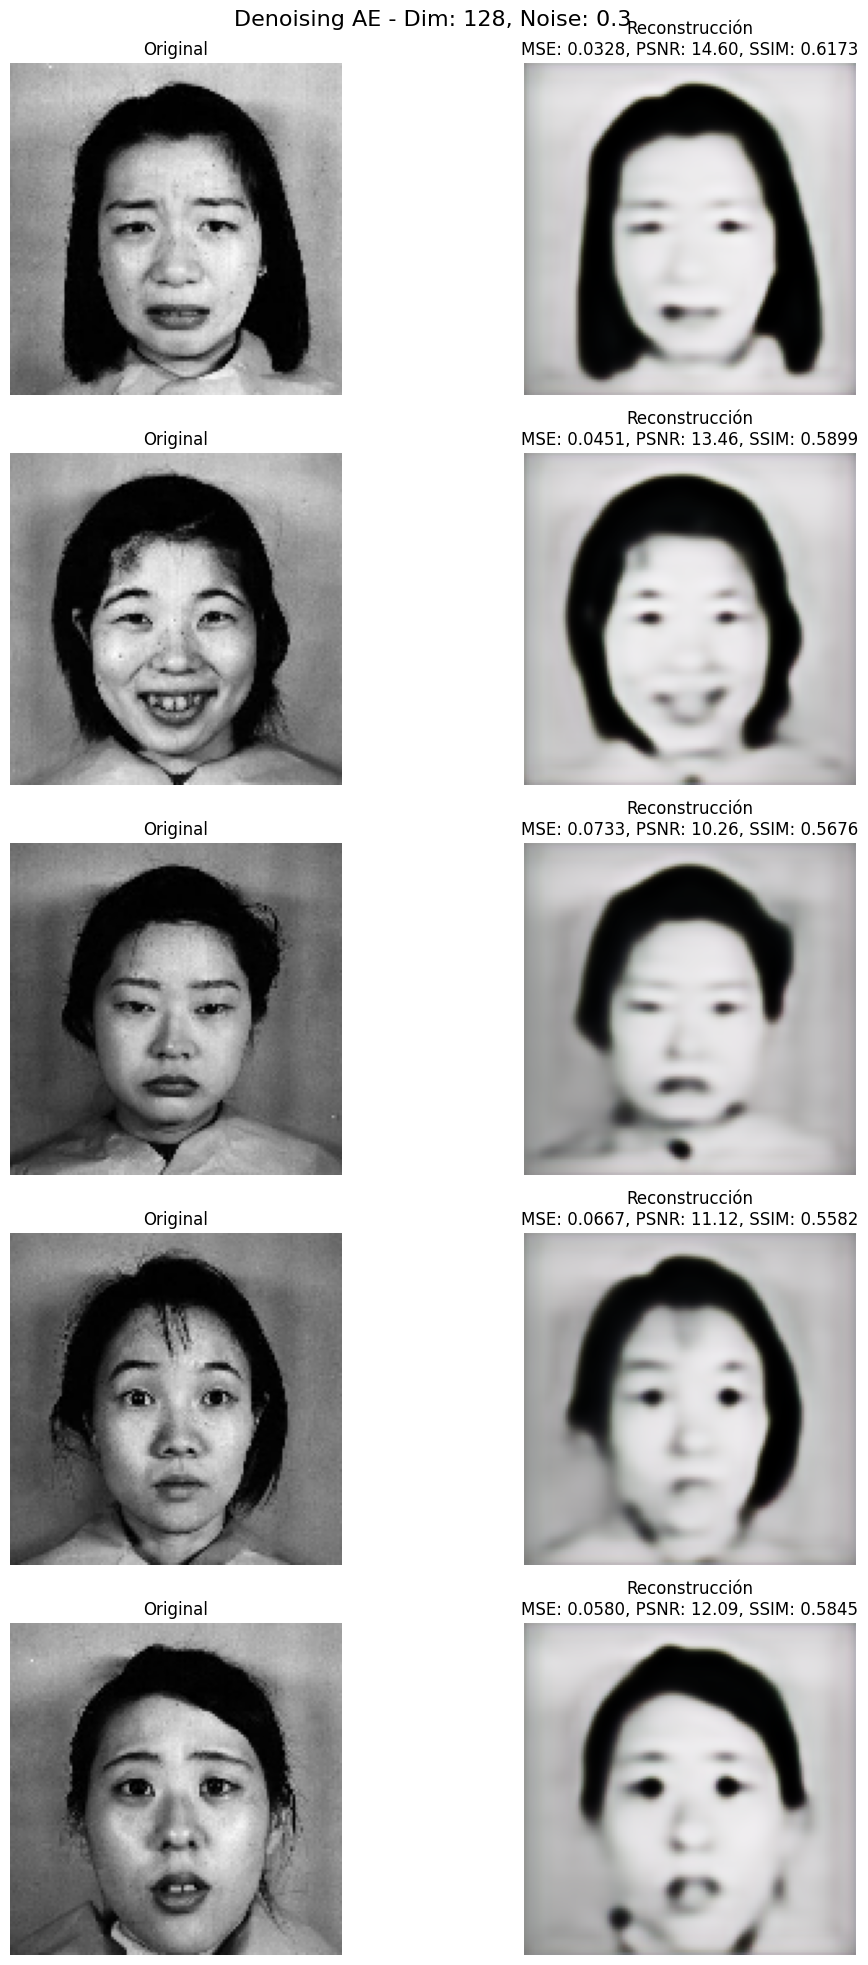


Reconstrucción Visual y Métricas - Sparse Autoencoder
1/1 [==============================] - 0s 108ms/step


<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for 

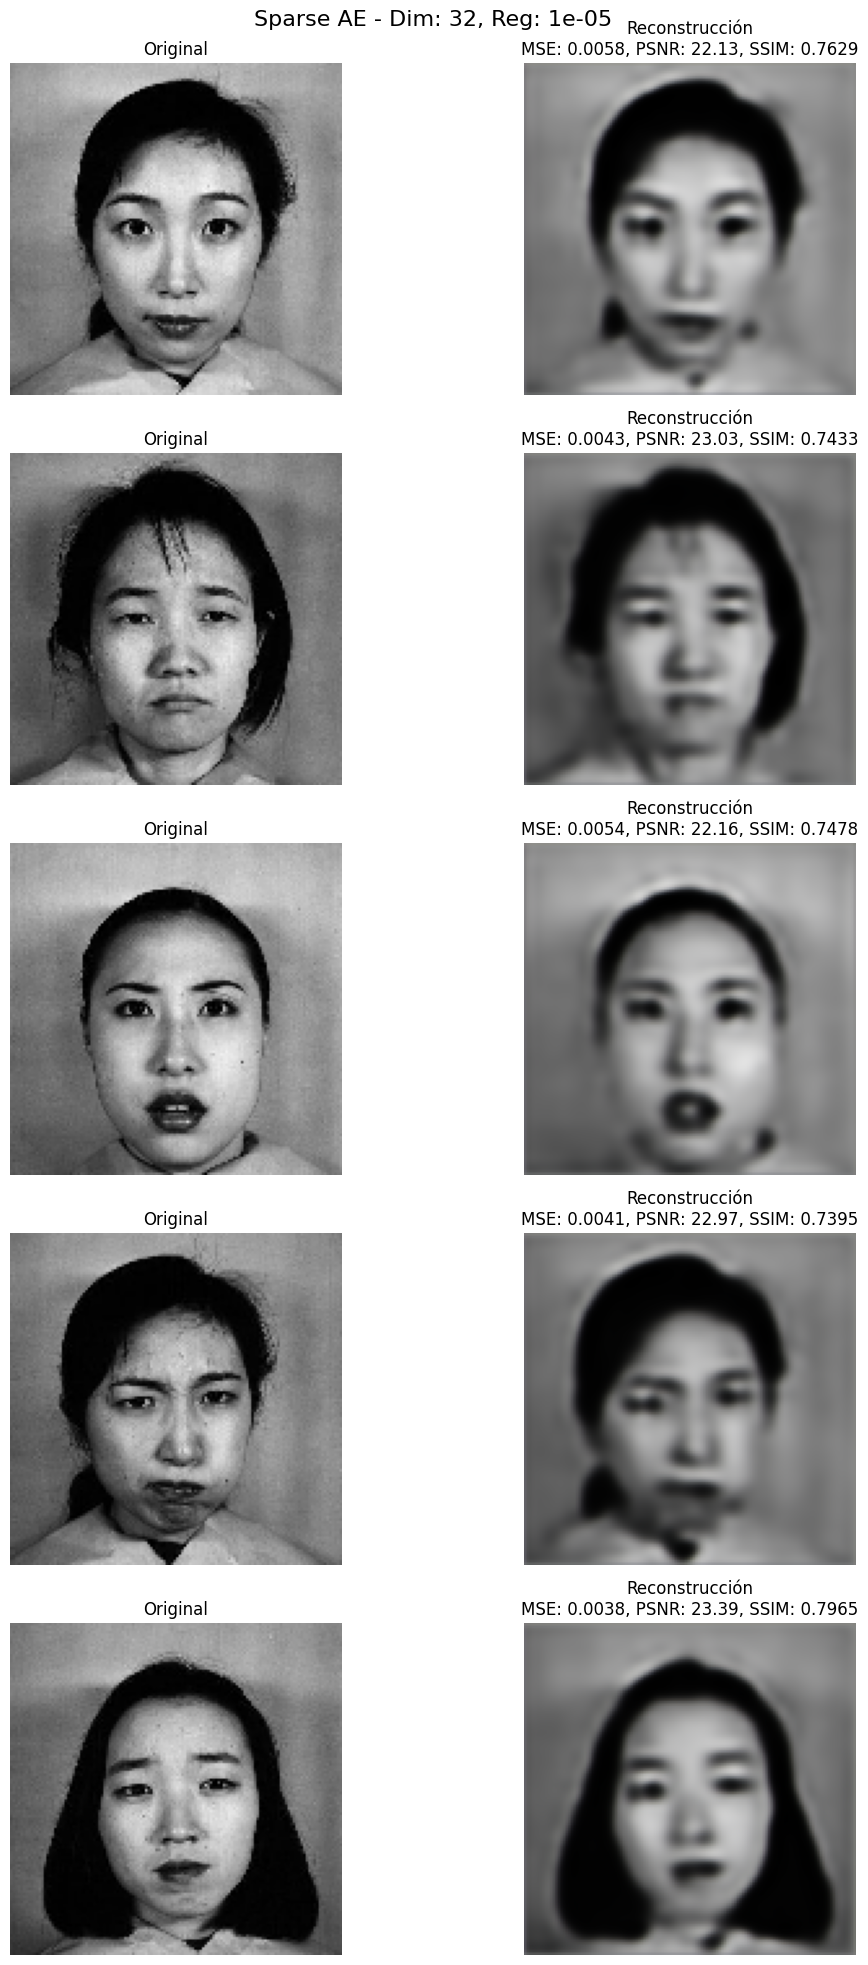

1/1 [==============================] - 0s 105ms/step


<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for 

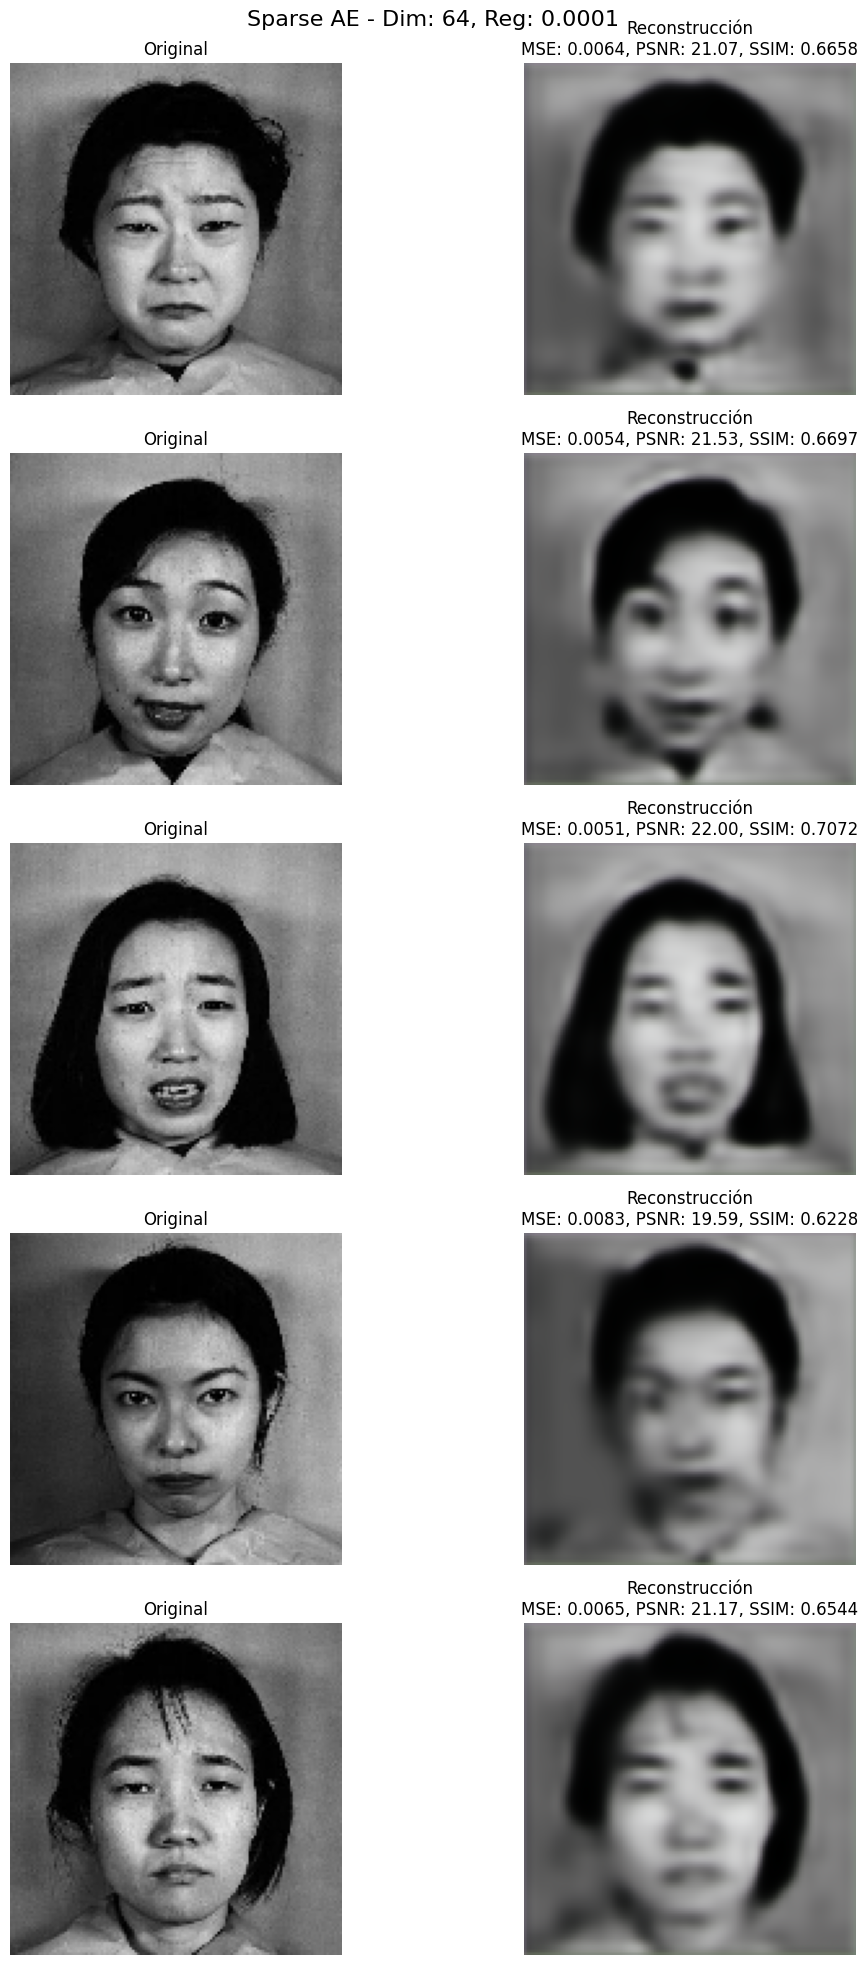

1/1 [==============================] - 0s 107ms/step


<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_val = ssim(original, reconstruido, multichannel=True, data_range=original.max() - original.min())
<ipython-input-55-258969855426>:13: FutureWarning: `multichannel` is a deprecated argument name for 

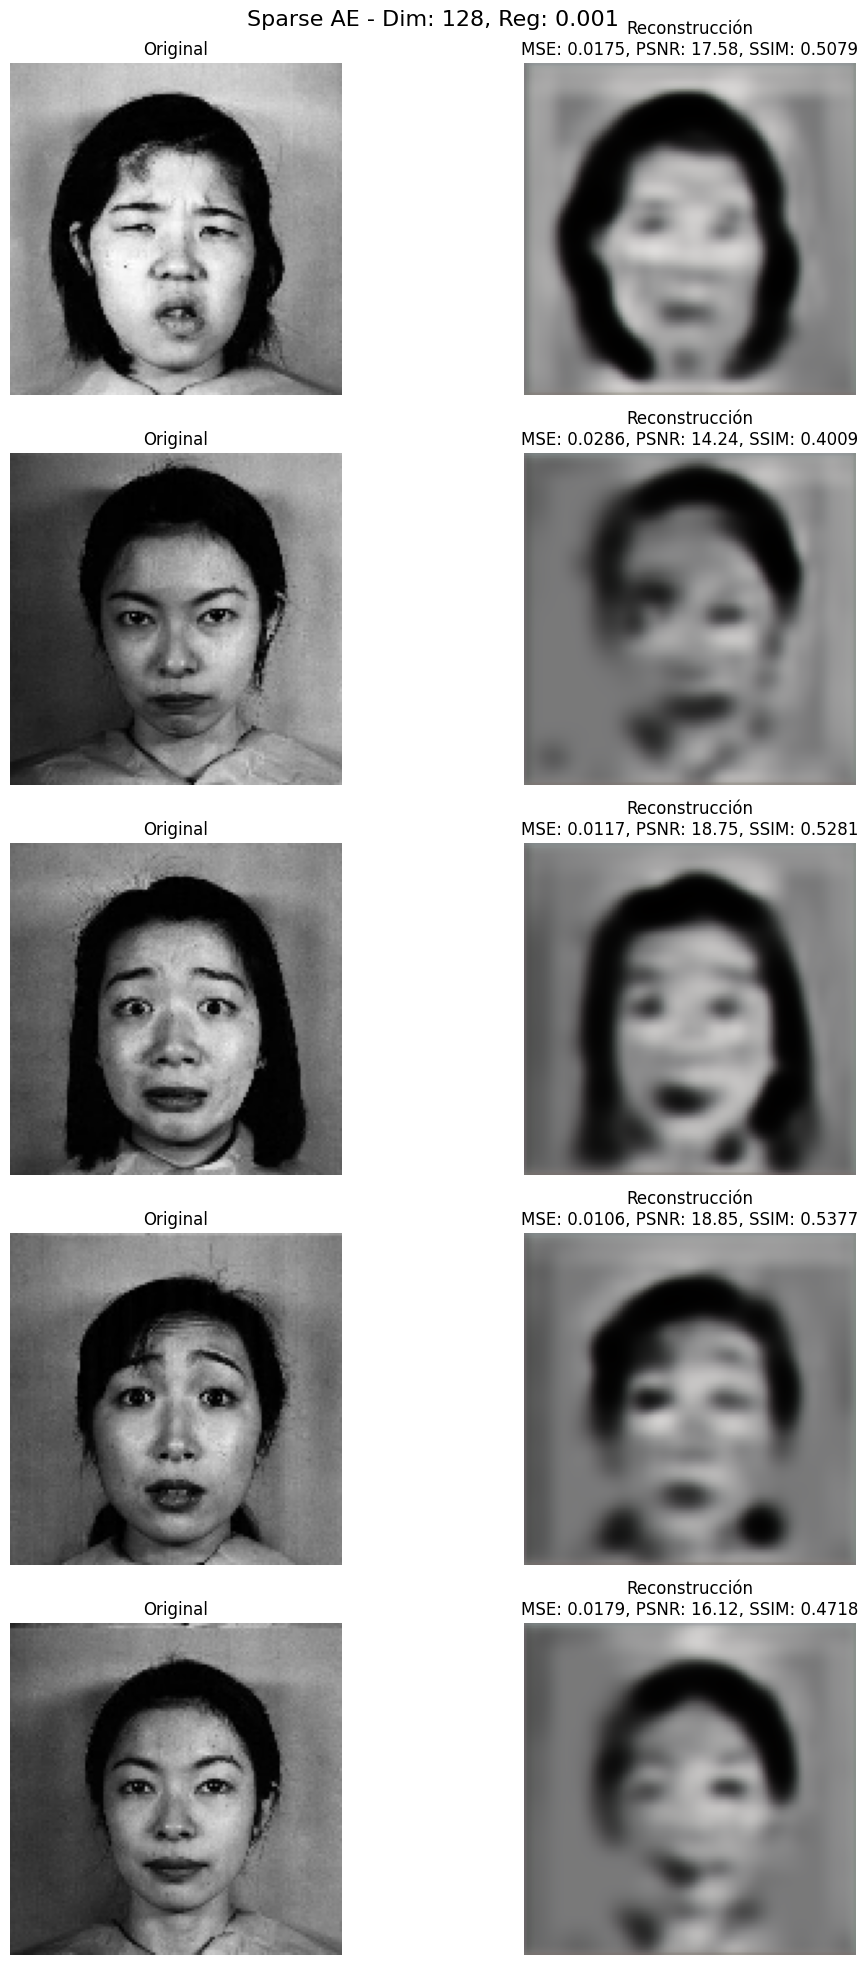

In [57]:
# Mostrar la reconstrucción visual y las métricas para cada configuración de Denoising Autoencoder
print("Reconstrucción Visual y Métricas - Denoising Autoencoder")
for i, (config, _) in enumerate(denoising_histories):
    encoding_dim = config['encoding_dim']
    noise_factor = config['noise_factor']
    autoencoder = denoising_models[i]
    mostrar_reconstruccion_visual(autoencoder, X_train, num_samples=5,
                                  title=f"Denoising AE - Dim: {encoding_dim}, Noise: {noise_factor}")

# Mostrar la reconstrucción visual y las métricas para cada configuración de Sparse Autoencoder
print("\nReconstrucción Visual y Métricas - Sparse Autoencoder")
for i, (config, _) in enumerate(sparse_histories):
    encoding_dim = config['encoding_dim']
    regularization = config['regularization']
    autoencoder = sparse_models[i]
    mostrar_reconstruccion_visual(autoencoder, X_train, num_samples=5,
                                  title=f"Sparse AE - Dim: {encoding_dim}, Reg: {regularization}")

In [60]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

def evaluar_espacio_latente(autoencoder, X, n_clusters=3, use_pca=False, clustering_method='kmeans'):
    # Generar el espacio latente
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-7].output)
    latent_space = encoder.predict(X)
    latent_flattened = latent_space.reshape(len(latent_space), -1)

    # Normalizar el espacio latente
    scaler = StandardScaler()
    latent_scaled = scaler.fit_transform(latent_flattened)

    # Opcional: Reducción de dimensionalidad usando PCA
    if use_pca:
        pca = PCA(n_components=2)
        latent_reduced = pca.fit_transform(latent_scaled)
    else:
        latent_reduced = latent_scaled

    # Selección del método de clustering
    if clustering_method == 'kmeans':
        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    elif clustering_method == 'agglomerative':
        clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    else:
        raise ValueError("Método de clustering no soportado: usa 'kmeans' o 'agglomerative'")

    # Aplicar clustering
    cluster_labels = clusterer.fit_predict(latent_reduced)

    # Calcular las métricas de calidad del clustering
    silhouette_avg = silhouette_score(latent_reduced, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(latent_reduced, cluster_labels)

    # Imprimir los resultados
    print(f"Clustering Method: {clustering_method.upper()}")
    print(f"Latent Dimensionality: {latent_space.shape[1]}")
    print(f"Use PCA: {use_pca}")
    print(f"Number of Clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print("\n" + "-"*40 + "\n")

    return silhouette_avg, calinski_harabasz

# Ejemplo de uso con diferentes configuraciones
print("Evaluación de Calidad del Espacio Latente")

# Evaluación para Denoising Autoencoder
for i, (config, _) in enumerate(denoising_histories):
    encoding_dim = config['encoding_dim']
    noise_factor = config['noise_factor']
    autoencoder = denoising_models[i]

    print(f"Evaluación para Denoising AE - Dim: {encoding_dim}, Noise Factor: {noise_factor}")

    # Prueba de clustering con diferentes configuraciones
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=False, clustering_method='kmeans')
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=True, clustering_method='kmeans')
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=False, clustering_method='agglomerative')
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=True, clustering_method='agglomerative')

# Evaluación para Sparse Autoencoder
for i, (config, _) in enumerate(sparse_histories):
    encoding_dim = config['encoding_dim']
    regularization = config['regularization']
    autoencoder = sparse_models[i]

    print(f"Evaluación para Sparse AE - Dim: {encoding_dim}, Regularization: {regularization}")

    # Prueba de clustering con diferentes configuraciones
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=False, clustering_method='kmeans')
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=True, clustering_method='kmeans')
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=False, clustering_method='agglomerative')
    evaluar_espacio_latente(autoencoder, X_train, n_clusters=3, use_pca=True, clustering_method='agglomerative')

Evaluación de Calidad del Espacio Latente
Evaluación para Denoising AE - Dim: 32, Noise Factor: 0.1
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1953
Calinski-Harabasz Index: 32.4739

----------------------------------------

5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5513
Calinski-Harabasz Index: 226.6611

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1953
Calinski-Harabasz Index: 32.4739

----------------------------------------

5/5 [==============================] - 0s 4ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5513
Calinski-Harabasz Index: 226.6607

----------------------------------------

Evaluación para Denoising AE - Dim: 64, Noise Factor: 0.2
5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1714
Calinski-Harabasz Index: 28.5000

----------------------------------------

5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5706
Calinski-Harabasz Index: 245.9239

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1438
Calinski-Harabasz Index: 25.5822

----------------------------------------

5/5 [==============================] - 0s 4ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5693
Calinski-Harabasz Index: 242.9856

----------------------------------------

Evaluación para Denoising AE - Dim: 128, Noise Factor: 0.3
5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1659
Calinski-Harabasz Index: 26.4289

----------------------------------------

5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5903
Calinski-Harabasz Index: 259.3354

----------------------------------------

5/5 [==============================] - 0s 4ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1428
Calinski-Harabasz Index: 23.9274

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5894
Calinski-Harabasz Index: 256.4067

----------------------------------------

Evaluación para Sparse AE - Dim: 32, Regularization: 1e-05
5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.0976
Calinski-Harabasz Index: 16.2710

----------------------------------------

5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5681
Calinski-Harabasz Index: 207.6326

----------------------------------------

5/5 [==============================] - 0s 4ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1707
Calinski-Harabasz Index: 15.5690

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5681
Calinski-Harabasz Index: 207.6330

----------------------------------------

Evaluación para Sparse AE - Dim: 64, Regularization: 0.0001
5/5 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.0425
Calinski-Harabasz Index: 9.5547

----------------------------------------

5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5382
Calinski-Harabasz Index: 226.2074

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.0687
Calinski-Harabasz Index: 9.6424

----------------------------------------

5/5 [==============================] - 0s 4ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5479
Calinski-Harabasz Index: 220.8955

----------------------------------------

Evaluación para Sparse AE - Dim: 128, Regularization: 0.001
5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.0561
Calinski-Harabasz Index: 10.9030

----------------------------------------

5/5 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clustering Method: KMEANS
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5297
Calinski-Harabasz Index: 240.5233

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: False
Number of Clusters: 3
Silhouette Score: 0.1251
Calinski-Harabasz Index: 11.0390

----------------------------------------

5/5 [==============================] - 0s 3ms/step
Clustering Method: AGGLOMERATIVE
Latent Dimensionality: 32
Use PCA: True
Number of Clusters: 3
Silhouette Score: 0.5307
Calinski-Harabasz Index: 233.1754

----------------------------------------



# Mejor opcion: Denoising AE con Dim: 128 y Noise Factor: 0.3

In [62]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Definir la mejor configuración encontrada
best_autoencoder = denoising_models[2]  # Este índice debe coincidir con el Denoising AE con Dim: 128 y Noise Factor: 0.3
n_clusters = 3
use_pca = True

# Generar el espacio latente para el conjunto de prueba
encoder = Model(inputs=best_autoencoder.input, outputs=best_autoencoder.layers[-7].output)
latent_space_test = encoder.predict(X_test)
latent_flattened_test = latent_space_test.reshape(len(latent_space_test), -1)

# Normalizar el espacio latente
scaler = StandardScaler()
latent_scaled_test = scaler.fit_transform(latent_flattened_test)

# Aplicar PCA si es necesario
if use_pca:
    pca = PCA(n_components=2)
    latent_reduced_test = pca.fit_transform(latent_scaled_test)
else:
    latent_reduced_test = latent_scaled_test

# Aplicar el método de clustering (KMeans)
clusterer = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_test = clusterer.fit_predict(latent_reduced_test)

# Calcular las métricas de clasificación en el conjunto de prueba
silhouette_avg_test = silhouette_score(latent_reduced_test, cluster_labels_test)
davies_bouldin_test = davies_bouldin_score(latent_reduced_test, cluster_labels_test)

# Imprimir los resultados
print("Resultados en el conjunto de prueba externo:")
print(f"Silhouette Score: {silhouette_avg_test:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_test:.4f}")

1/1 [==============================] - 0s 68ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resultados en el conjunto de prueba externo:
Silhouette Score: 0.5759
Davies-Bouldin Index: 0.4069


Interpretación del Silhouette Score:
* Cercano a 1: Indica clusters bien definidos y separados; los puntos están cerca de su propio cluster y lejos de los clusters vecinos.
* Cercano a 0: Sugiere que los clusters se superponen y que los puntos están cerca de los límites de otros clusters, por lo que la separación no es ideal.
* Negativo: Indica que muchos puntos pueden estar en el cluster incorrecto o que el clustering no tiene una estructura clara.


Interpretación del DBI:
* DBI cercano a 0: Indica una excelente separación y compactación, lo cual es ideal en clustering.
* Valores de DBI bajos (por debajo de 1.0 generalmente se considera bueno): Sugiere que los clusters están razonablemente bien formados y separados.
* Valores altos de DBI (mayores que 1.0): Indican que los clusters están menos bien definidos y que los puntos están menos agrupados, posiblemente con una superposición significativa entre clusters.

* 0.57 indica que los clusters tienen una separación aceptable y cohesión interna moderada, lo cual puede ser adecuado para muchos problemas de clustering.
* Este valor, junto con un Davies-Bouldin Index de 0.4, sugiere que el esquema de clustering es en general bueno, con clusters razonablemente definidos y bien separados.

___